<a href="https://colab.research.google.com/github/jeewoo1025/aiEducation/blob/main/221027_Heatmap_(RoBERTa).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
article = "A group of Muslim migrants have been arrested for 'aggravated murder' after allegedly throwing 12 Christians into the Mediterranean sea during a recent crossing from Libya, Italian police reports. Witnesses say a fight broke out on a rubber dinghy carrying more than 100 African migrants from Libya to Sicily, after which the men were thrown to their deaths. A group of 15 men have now been arrested on suspicion of 'multiple aggravated murder motivated by religious hate,' Palermo police said in a statement. Murders: A fight over religion broke out on a boat carrying 105 migrants from Libya, after which 12 men 'professing the Christian faith' were thrown to their deaths. Pictured: Migrants are transferred to holding centers after disembarking from in Augusta's port, near Siracusa, Sicily. Italian police say they were informed of the alleged attacks by a group of Nigerian and Ghanaian survivors upon their arrival in Palermo, Sicily yesterday. The survivors said they had boarded a rubber boat on the Libyan coast on April 14, which had 105 passengers aboard. During the crossing, a fight broke out over religion, with the group of Muslim passengers threatening the Nigerians and Ghanaians after the latter declared themselves to be Christians. 'The threats then materialised and 12 people, all Nigerian and Ghanaian, are believed to have drowned in the Mediterranean,' the police statement added. . The 15 migrants arrested over the attack on their arrival in Palermo are from the Ivory Coast, Senegal, Mali and Guinea Bissau. A group of 15 Muslim men, from the Ivory Coast, Senegal, Mali and Guinea Bissau, have now been arrested on suspicion of 'multiple aggravated murder motivated by religious hate' \xa0(not pictured) Italian Red Cross operators give first aid to immigrants as they arrive in the Italian port of Messina \xa0yesterday. This week, Italian coastguards intercepted more than 42 boats attempting to make the crossing to Europe. The police statement said their motive for the attack was that the victims 'professed the Christian faith while the aggressors were Muslim.' This followed reports earlier today of a shipwreck feared to have cost 41 lives off the Italian coast. Four men, two Nigerians, a Ghanaian and one from Niger, who had been rescued while floating in the Mediterranean by an Italian Navy helicopter reported the shipwreck once they arrived\xa0in the Italian port of Trapani today. . They said had left Tripoli in Libya on Saturday and stayed adrift for four days. The new tragedies come just days after aid agencies reported 400 presumed dead in the sinking of another ship near the Libyan coast. . The deaths have raised calls for a more robust search and rescue of the seas between Libya and Europe amid a surge in migration between the Middle East and Africa toward Italy."

In [ ]:
abstract = "Migrants\xa0from Nigeria and Ghana drown after being thrown overboard. Fight broke out on rubber dinghy carrying 105 from Libya to Italy. The men were thrown into sea 'for professing the Christian faith'   15 men arrested for 'aggravated murder motivated by religious hate'"

In [ ]:
candi = "fight over religion broke out on a rubber dinghy carrying 105 migrants from Libya to Sicily, witnesses say. After which 12 men 'professing the Christian faith' were thrown to their deaths. 15 Muslim men arrested on suspicion of 'multiple aggravated murder motivated by religious hate'"

In [ ]:
article 

"A group of Muslim migrants have been arrested for 'aggravated murder' after allegedly throwing 12 Christians into the Mediterranean sea during a recent crossing from Libya, Italian police reports. Witnesses say a fight broke out on a rubber dinghy carrying more than 100 African migrants from Libya to Sicily, after which the men were thrown to their deaths. A group of 15 men have now been arrested on suspicion of 'multiple aggravated murder motivated by religious hate,' Palermo police said in a statement. Murders: A fight over religion broke out on a boat carrying 105 migrants from Libya, after which 12 men 'professing the Christian faith' were thrown to their deaths. Pictured: Migrants are transferred to holding centers after disembarking from in Augusta's port, near Siracusa, Sicily. Italian police say they were informed of the alleged attacks by a group of Nigerian and Ghanaian survivors upon their arrival in Palermo, Sicily yesterday. The survivors said they had boarded a rubber bo

In [ ]:
abstract

"Migrants\xa0from Nigeria and Ghana drown after being thrown overboard. Fight broke out on rubber dinghy carrying 105 from Libya to Italy. The men were thrown into sea 'for professing the Christian faith'   15 men arrested for 'aggravated murder motivated by religious hate'"

In [ ]:
candi

"fight over religion broke out on a rubber dinghy carrying 105 migrants from Libya to Sicily, witnesses say. After which 12 men 'professing the Christian faith' were thrown to their deaths. 15 Muslim men arrested on suspicion of 'multiple aggravated murder motivated by religious hate'"

In [ ]:
from bertviz import head_view, model_view
from transformers import RobertaTokenizer, Adafactor, AutoConfig, RobertaModel

model_ver = "roberta-base"
encoder = RobertaModel.from_pretrained(model_ver, output_attentions=True)
tok = RobertaTokenizer.from_pretrained(model_ver)

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaModel: ['lm_head.dense.bias', 'lm_head.dense.weight', 'lm_head.decoder.weight', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
# Only GOLD
inputs = tok.encode_plus(abstract, return_tensors='pt')
input_ids = inputs['input_ids']
attention = encoder(input_ids)[-1]
input_id_list = input_ids[0].tolist() # Batch index 0
tokens = tok.convert_ids_to_tokens(input_id_list, skip_special_tokens=True)
#print(f'tokens {len(tokens)} : {tokens}')
tokens = [tok.bos_token] + [x.replace("Ġ", "") for x in tokens] + [tok.sep_token]
new_tokens = tok.convert_tokens_to_string(tokens)

In [ ]:
print(f'tokens {len(tokens)} : {tokens}')
print(f'input_ids {input_ids.shape} : {input_ids}')

tokens 59 : ['<s>', 'M', 'igrants', 'Âł', 'from', 'Nigeria', 'and', 'Ghana', 'drown', 'after', 'being', 'thrown', 'overboard', '.', 'Fight', 'broke', 'out', 'on', 'rubber', 'ding', 'hy', 'carrying', '105', 'from', 'Libya', 'to', 'Italy', '.', 'The', 'men', 'were', 'thrown', 'into', 'sea', "'", 'for', 'profess', 'ing', 'the', 'Christian', 'faith', "'", '', '', '15', 'men', 'arrested', 'for', "'", 'agg', 'rav', 'ated', 'murder', 'motivated', 'by', 'religious', 'hate', "'", '</s>']
input_ids torch.Size([1, 59]) : tensor([[    0,   448, 24280, 50141,  7761,  2000,     8,  5498, 30431,    71,
           145,  5629, 35912,     4, 14381,  2263,    66,    15, 11283, 33676,
         11108,  3406, 11061,    31,  7662,     7,  2627,     4,    20,   604,
            58,  5629,    88,  3342,   128,  1990, 29200,   154,     5,  2412,
          3975,   108,  1437,  1437,   379,   604,  1128,    13,   128,  7165,
          6472,  1070,  1900,  7958,    30,  3458,  4157,   108,     2]])


In [ ]:
len(attention)

12

In [ ]:
attention[11].shape  # (bsz, num_heads, seq_len, seq_len)

torch.Size([1, 12, 59, 59])

In [ ]:
import seaborn
seaborn.set_context(context='talk')
%matplotlib inline

def draw(data, x, y, ax, filename):
  print(f'{filename}')
  seaborn.heatmap(data, xticklabels=x, square=True, yticklabels=y, vmin=0.0, vmax=1.0, cbar=False, ax=ax)
  plt.savefig(filename)

In [ ]:
attention[11].squeeze().shape

torch.Size([12, 59, 59])

Layer : 11 among 0 ~ 11
abstract : Migrants from Nigeria and Ghana drown after being thrown overboard. Fight broke out on rubber dinghy carrying 105 from Libya to Italy. The men were thrown into sea 'for professing the Christian faith'   15 men arrested for 'aggravated murder motivated by religious hate'
layer11_0.png
layer11_1.png
layer11_2.png
layer11_3.png
layer11_4.png
layer11_5.png
layer11_6.png
layer11_7.png
layer11_8.png
layer11_9.png
layer11_10.png
layer11_11.png


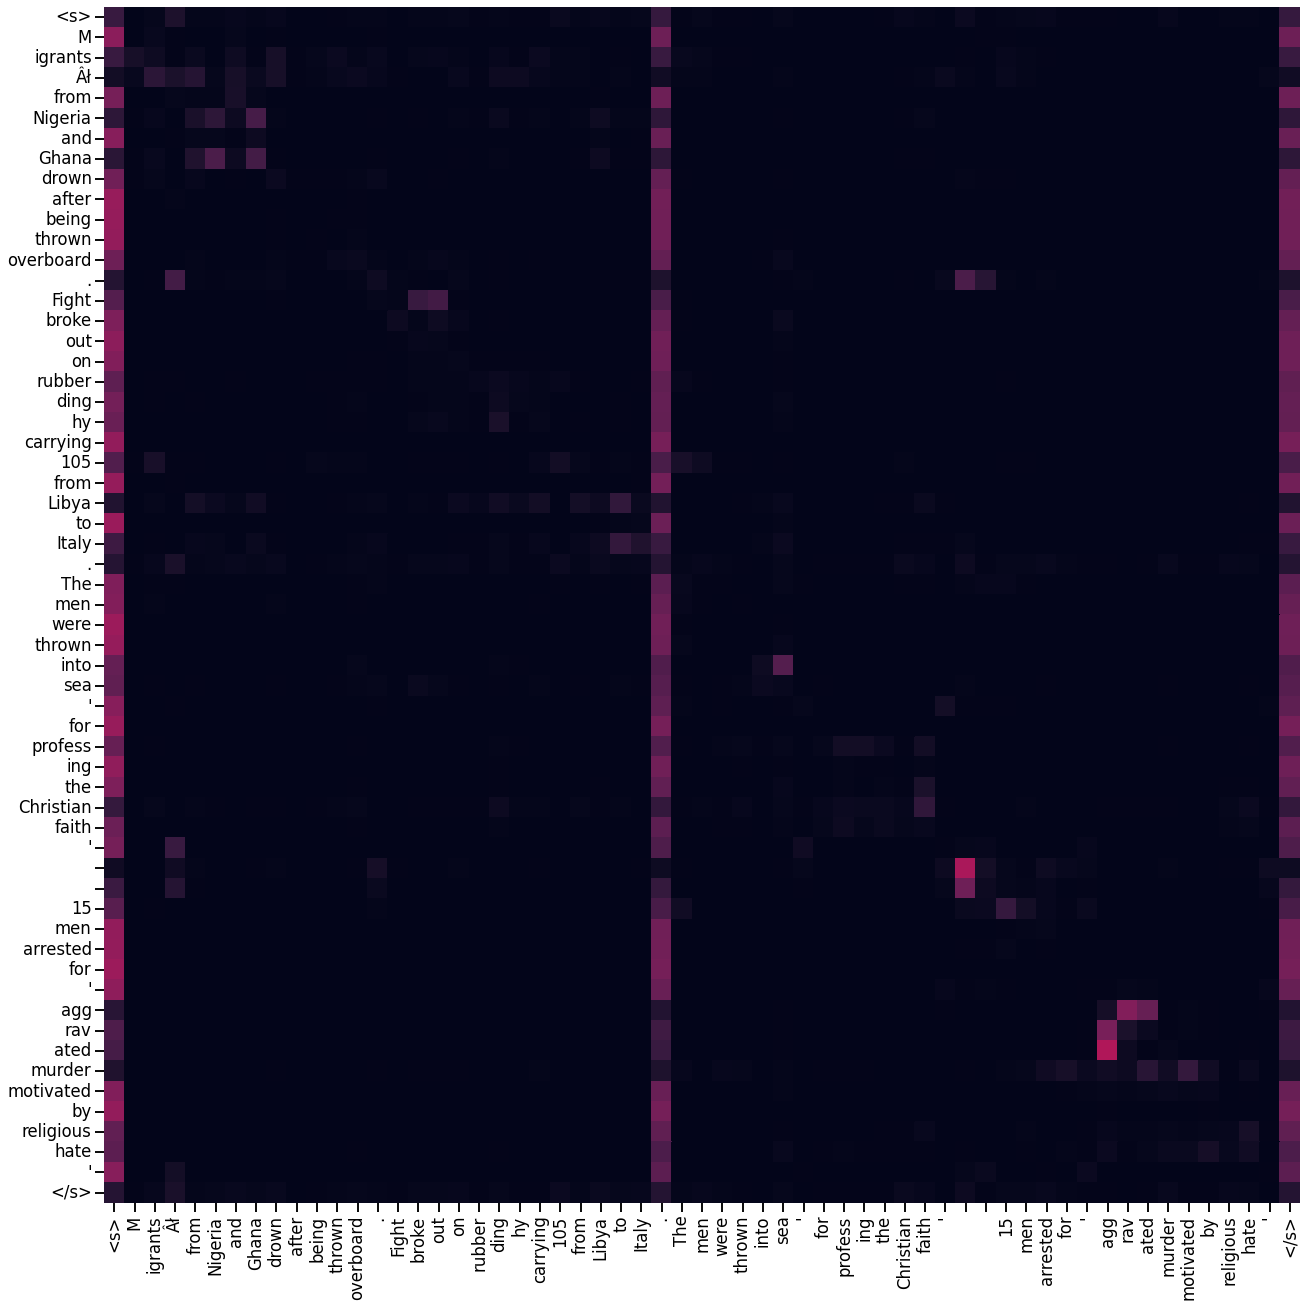

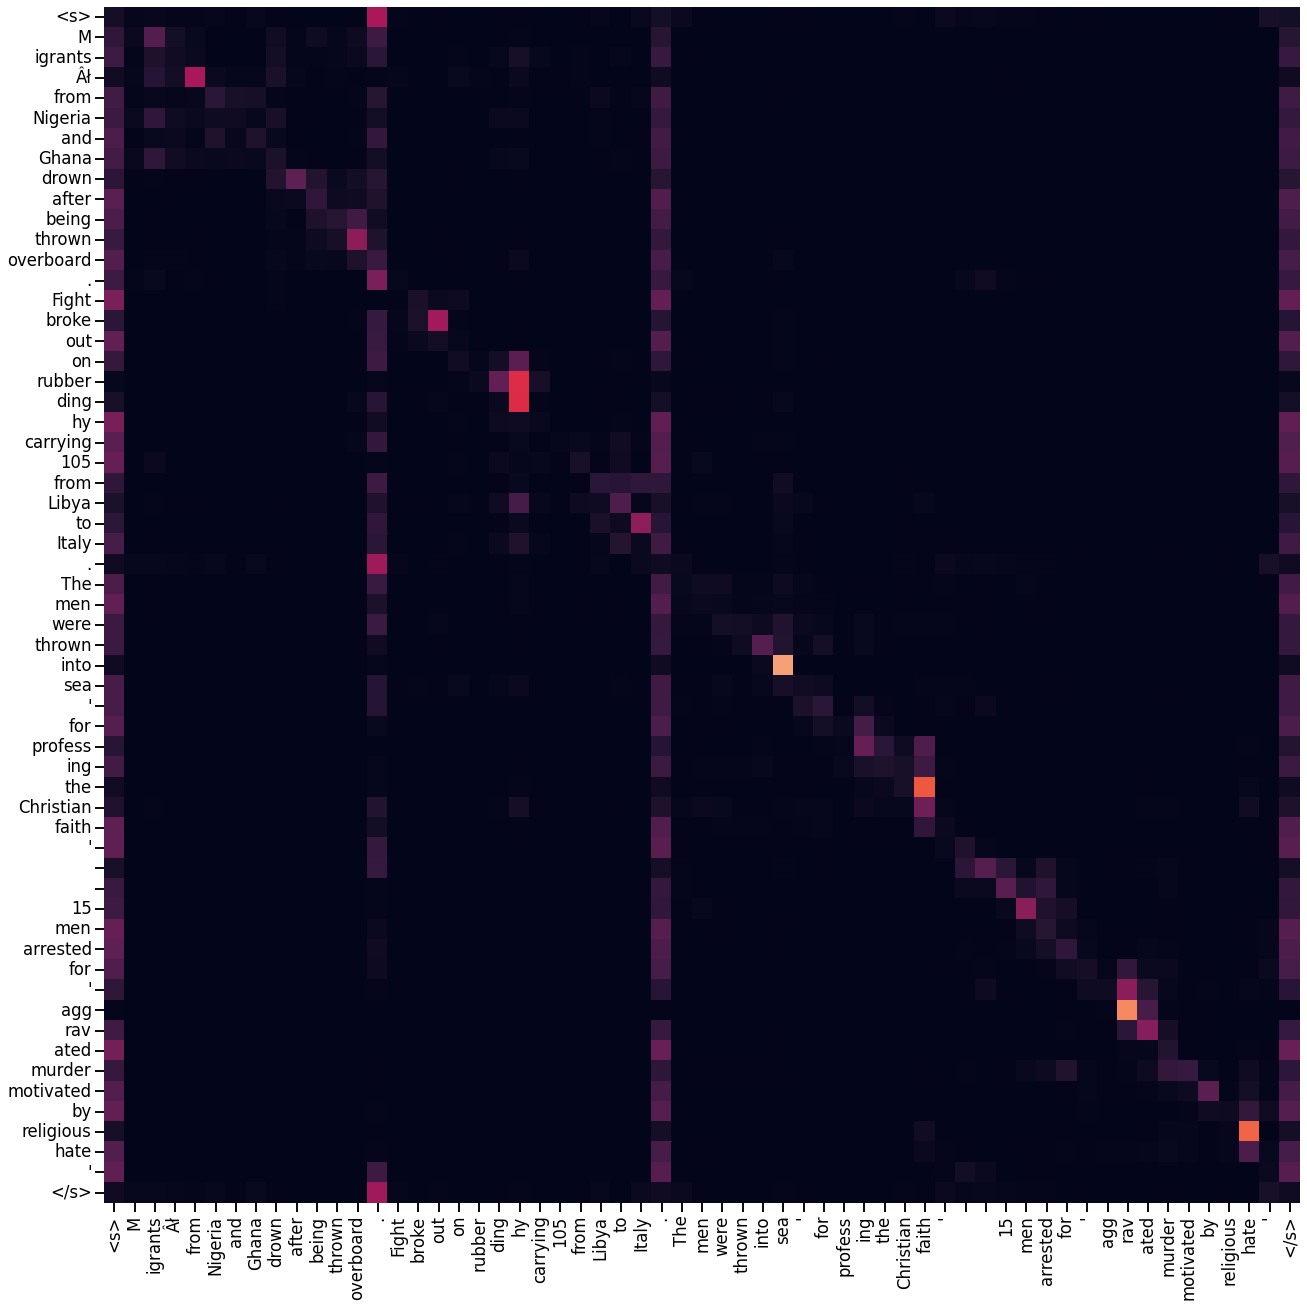

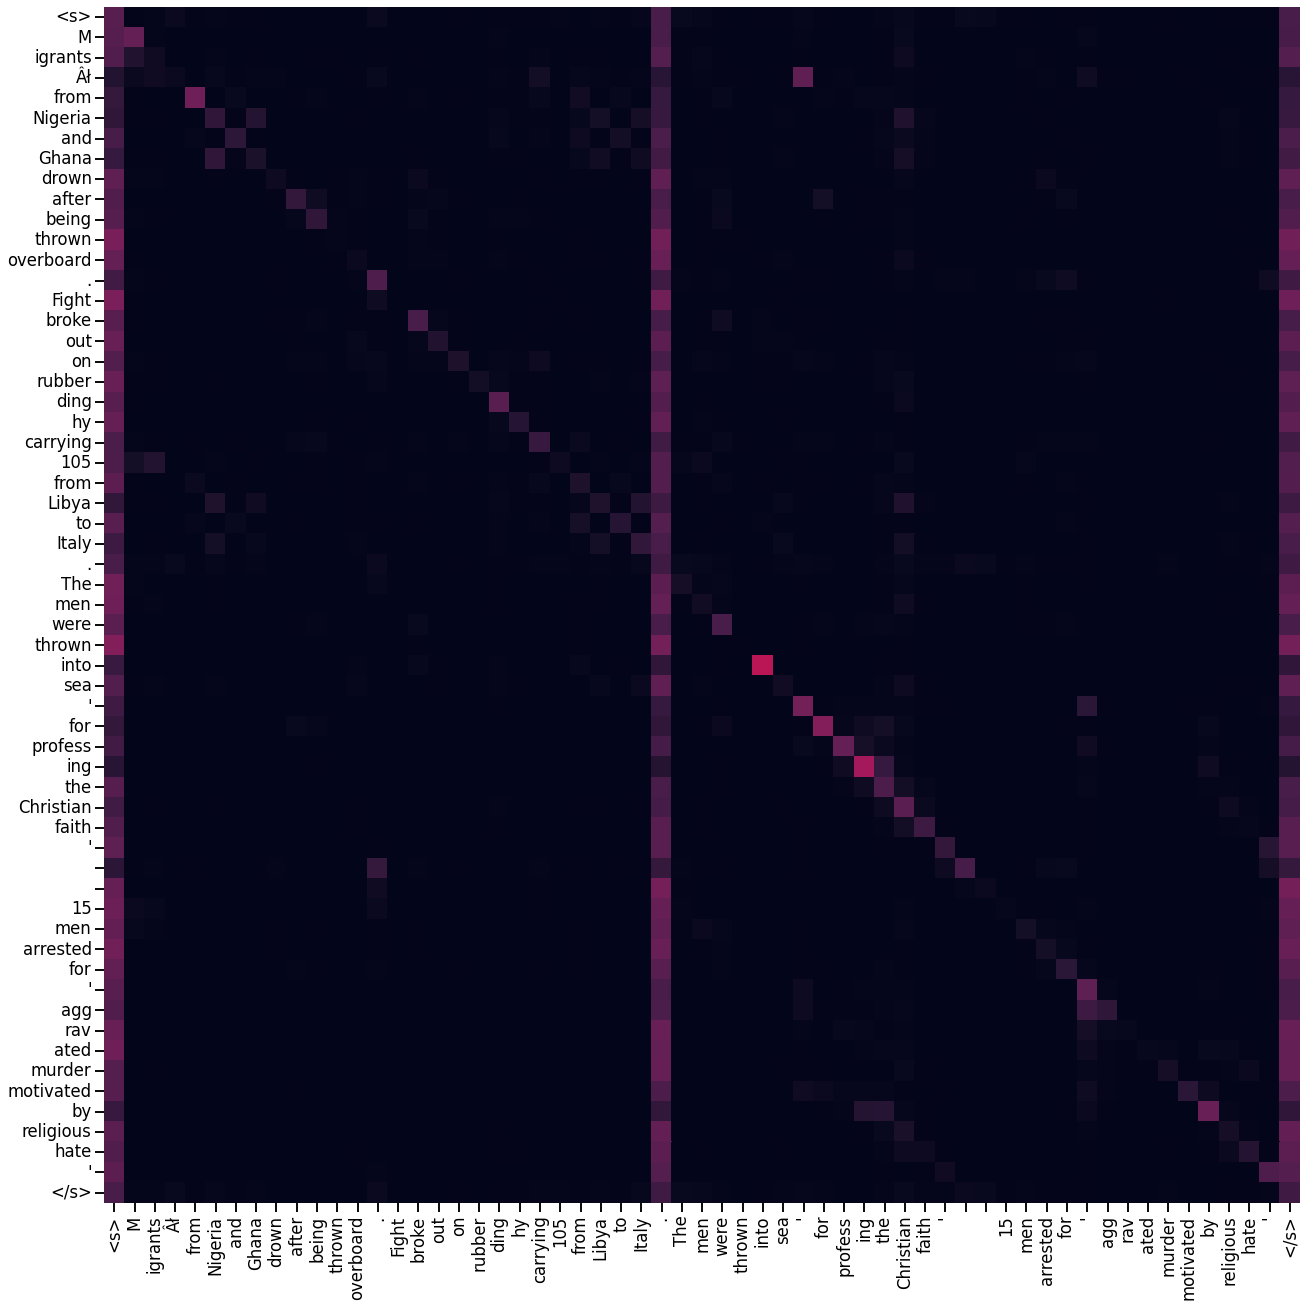

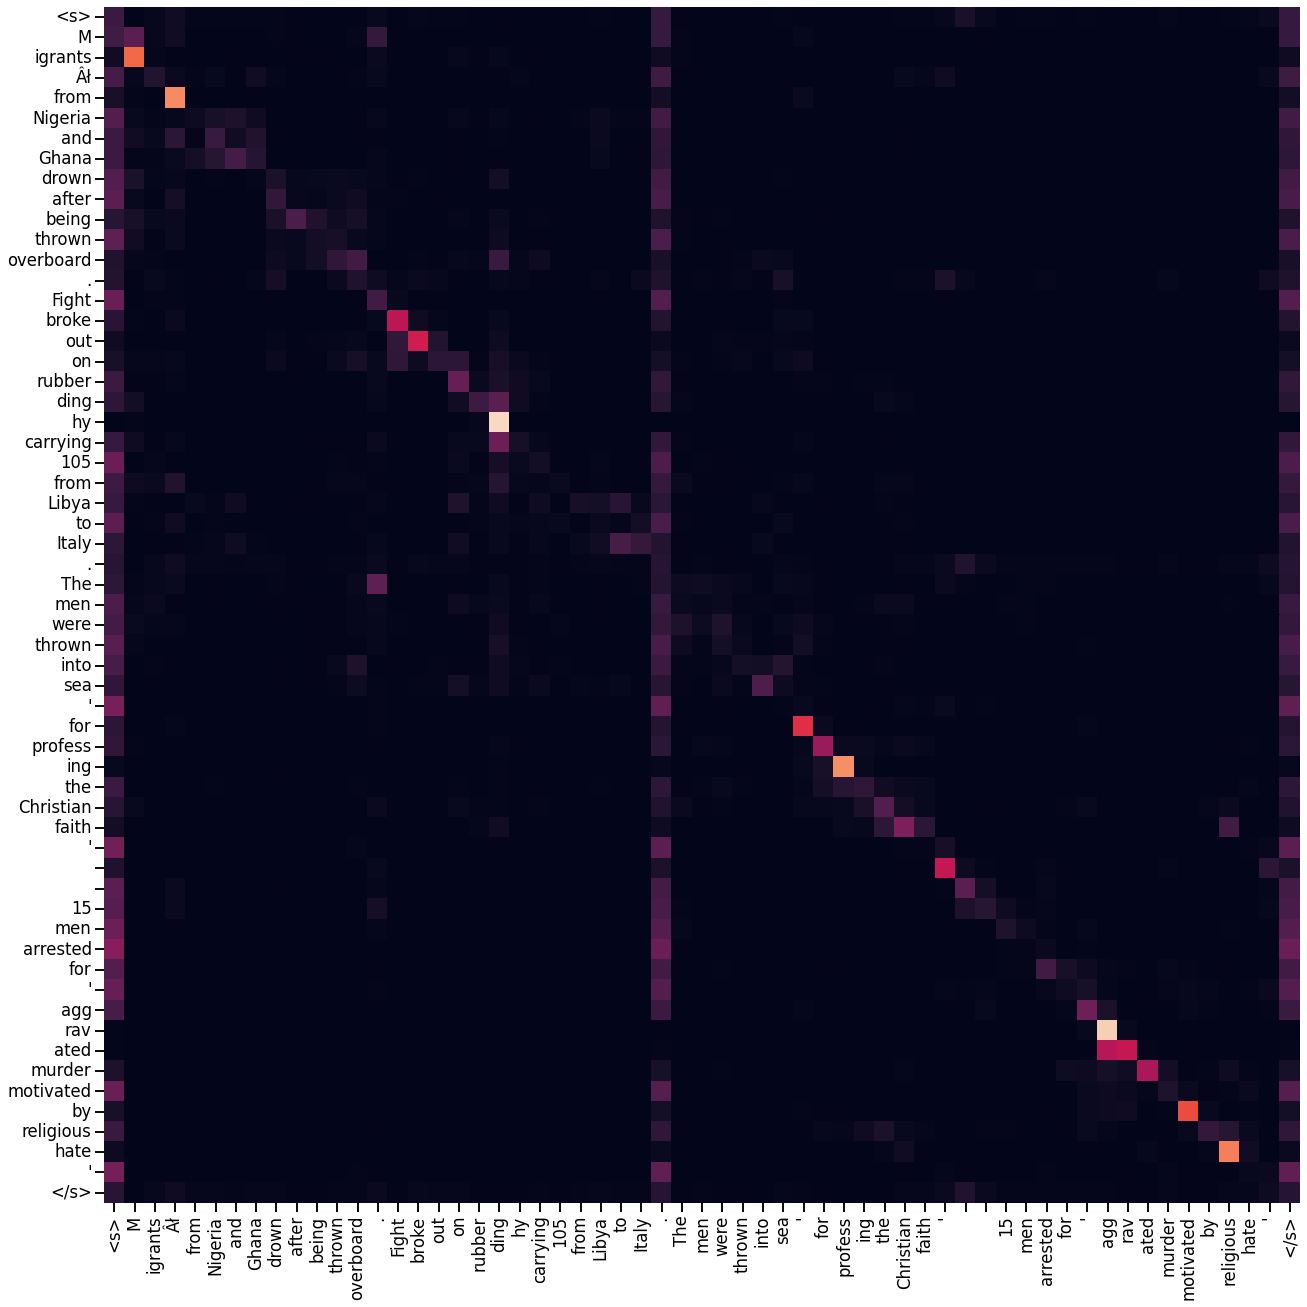

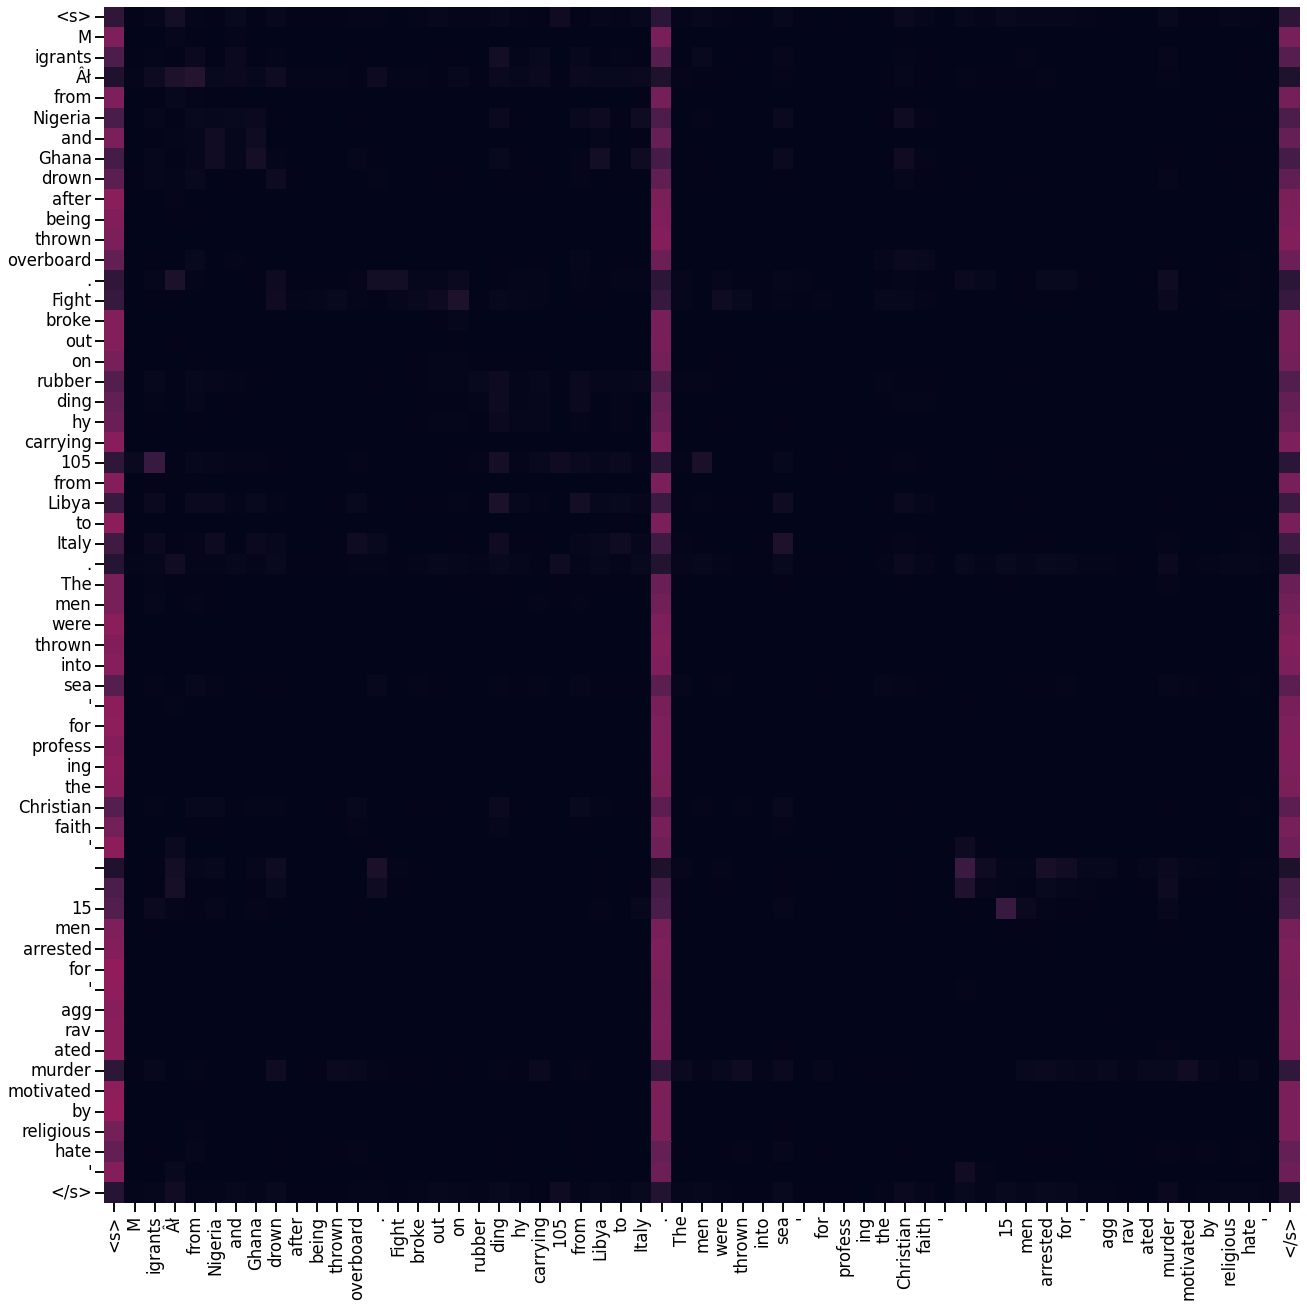

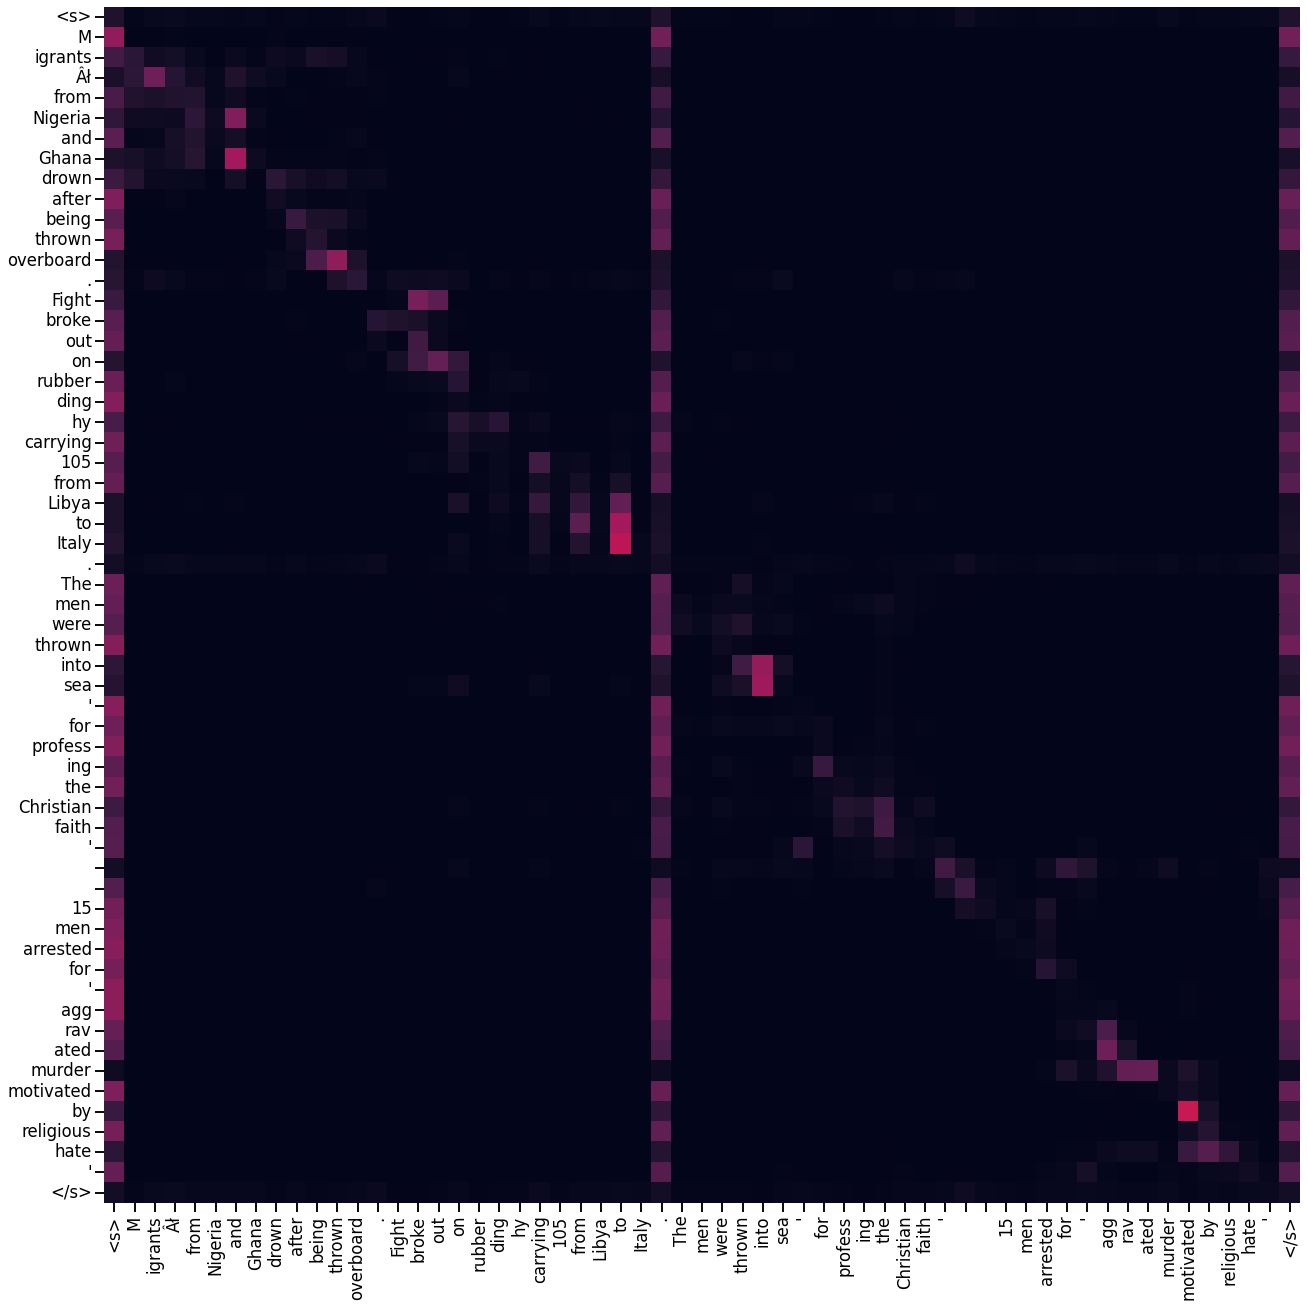

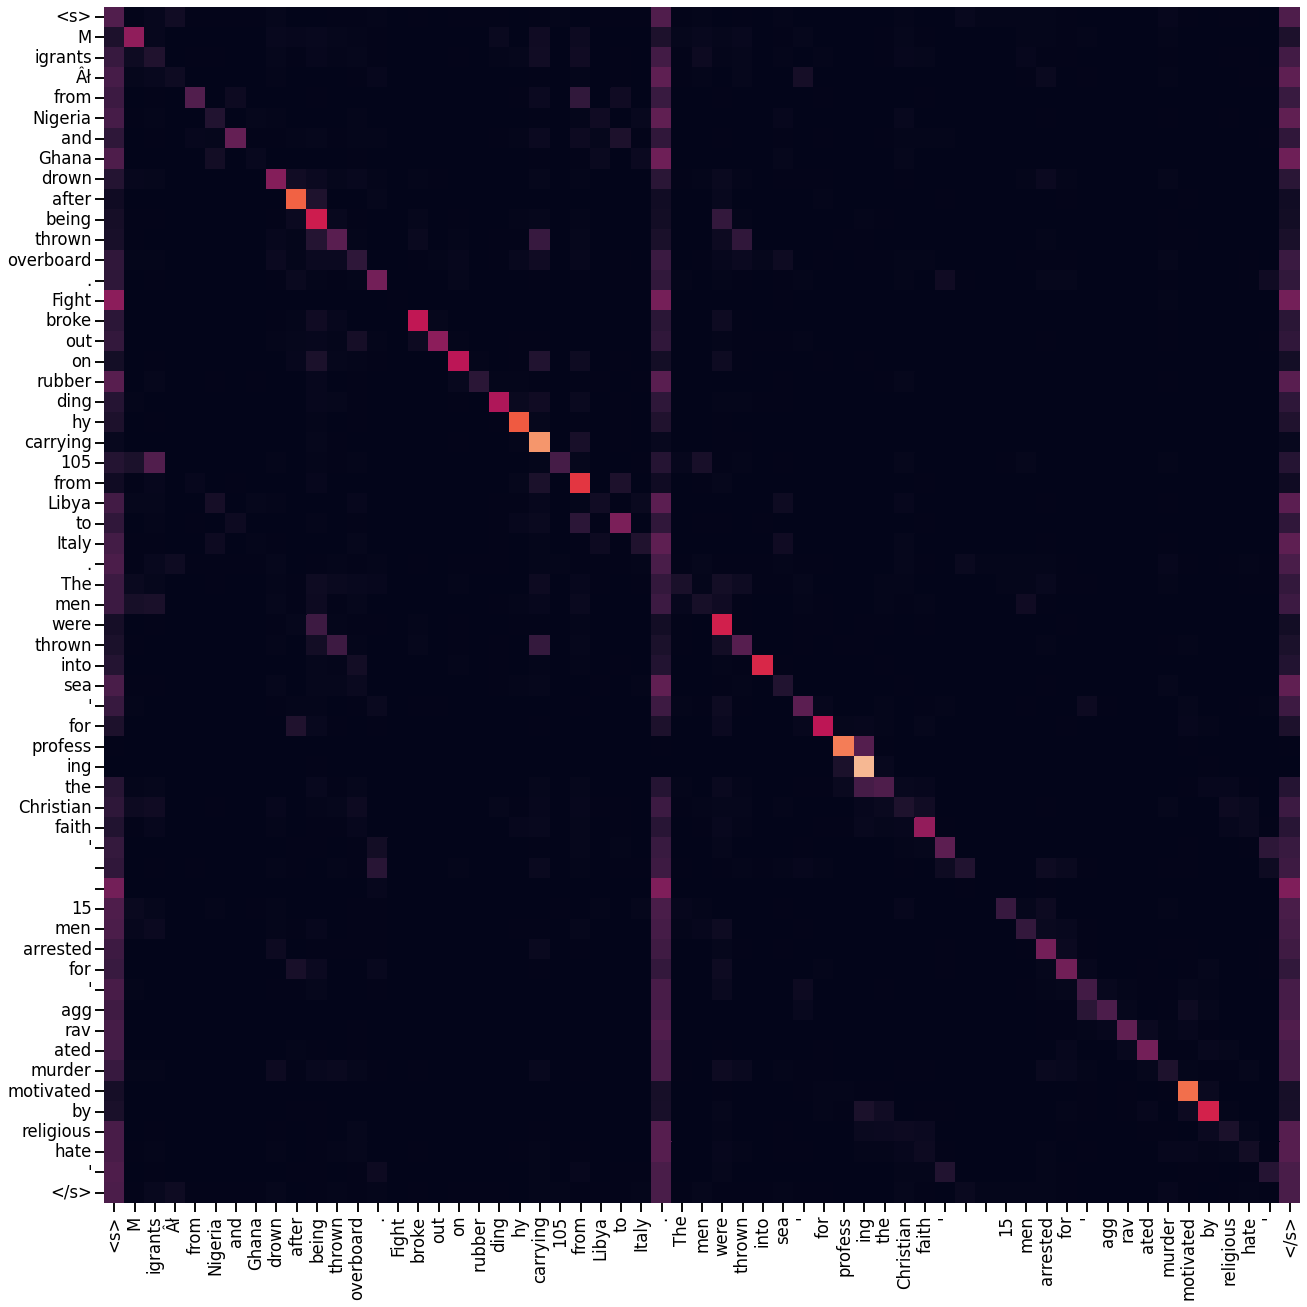

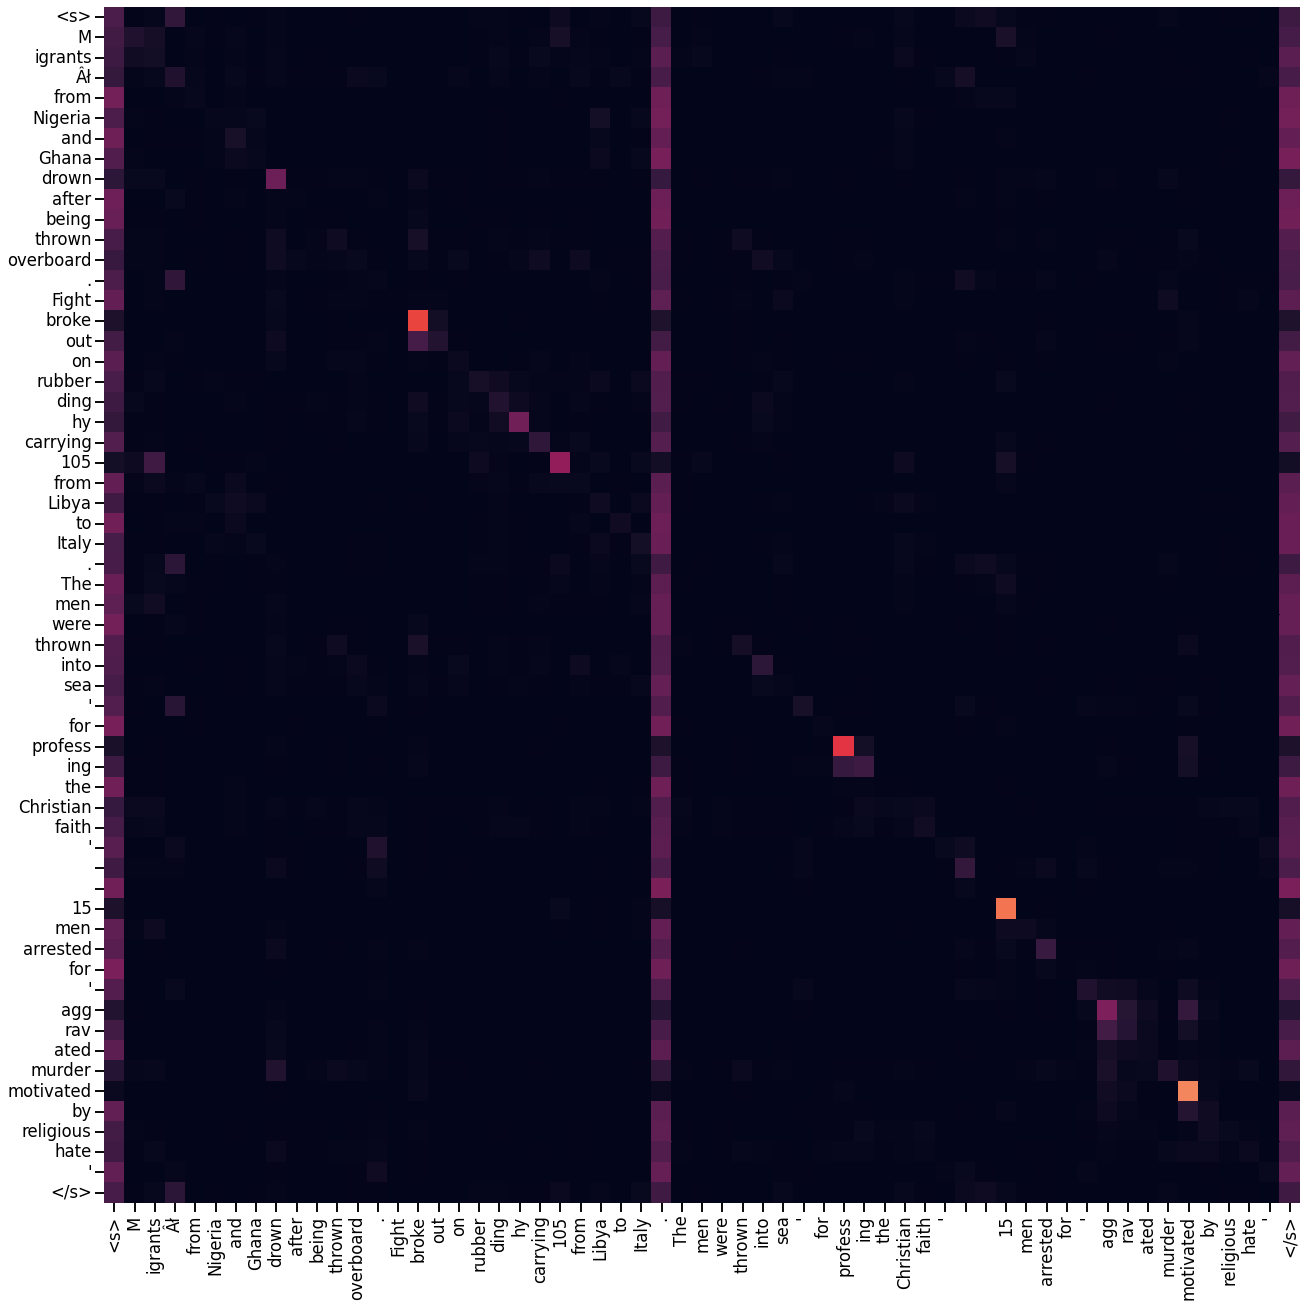

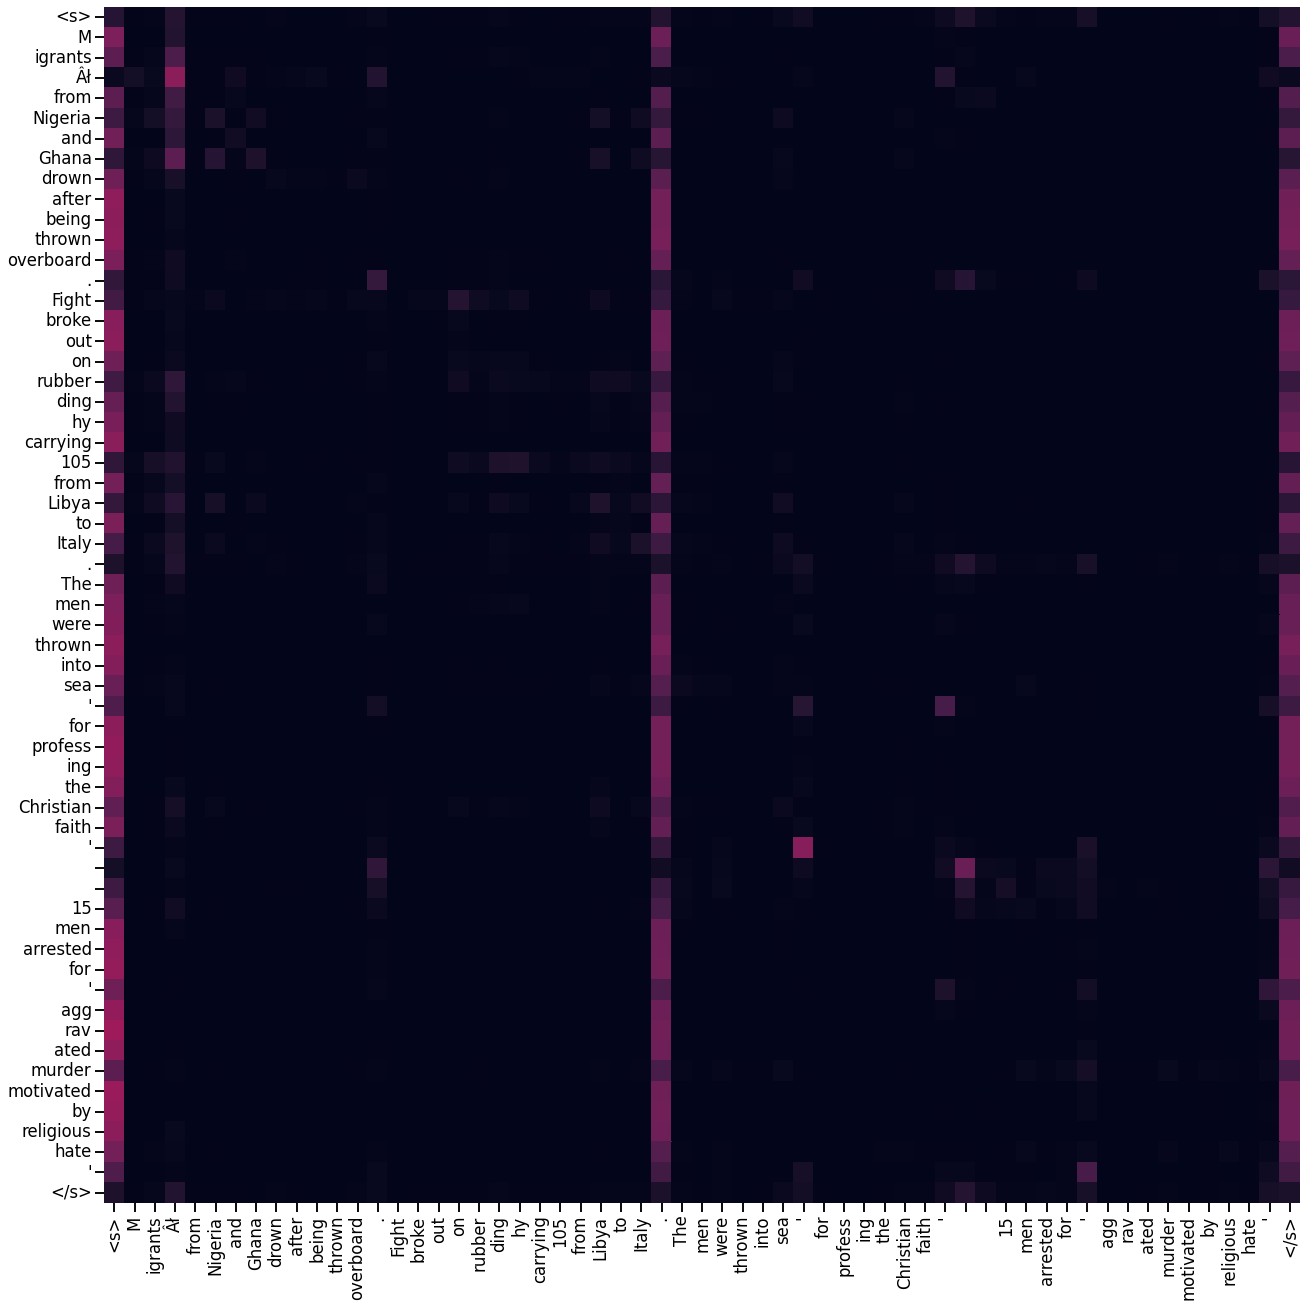

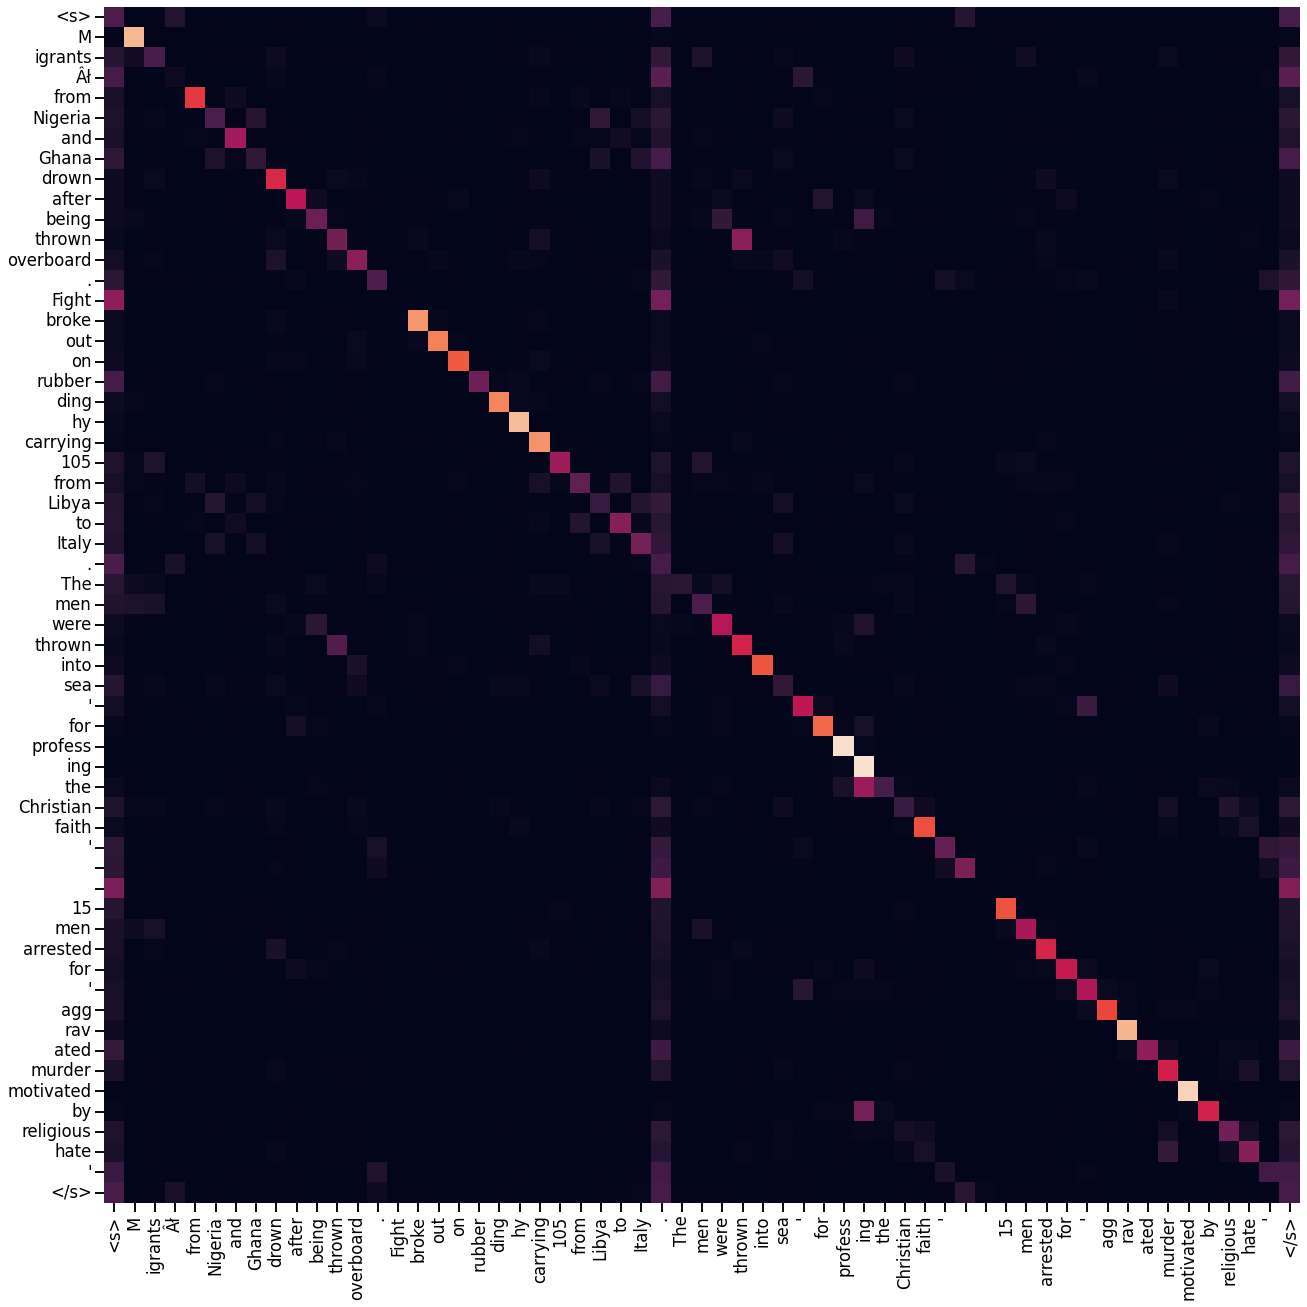

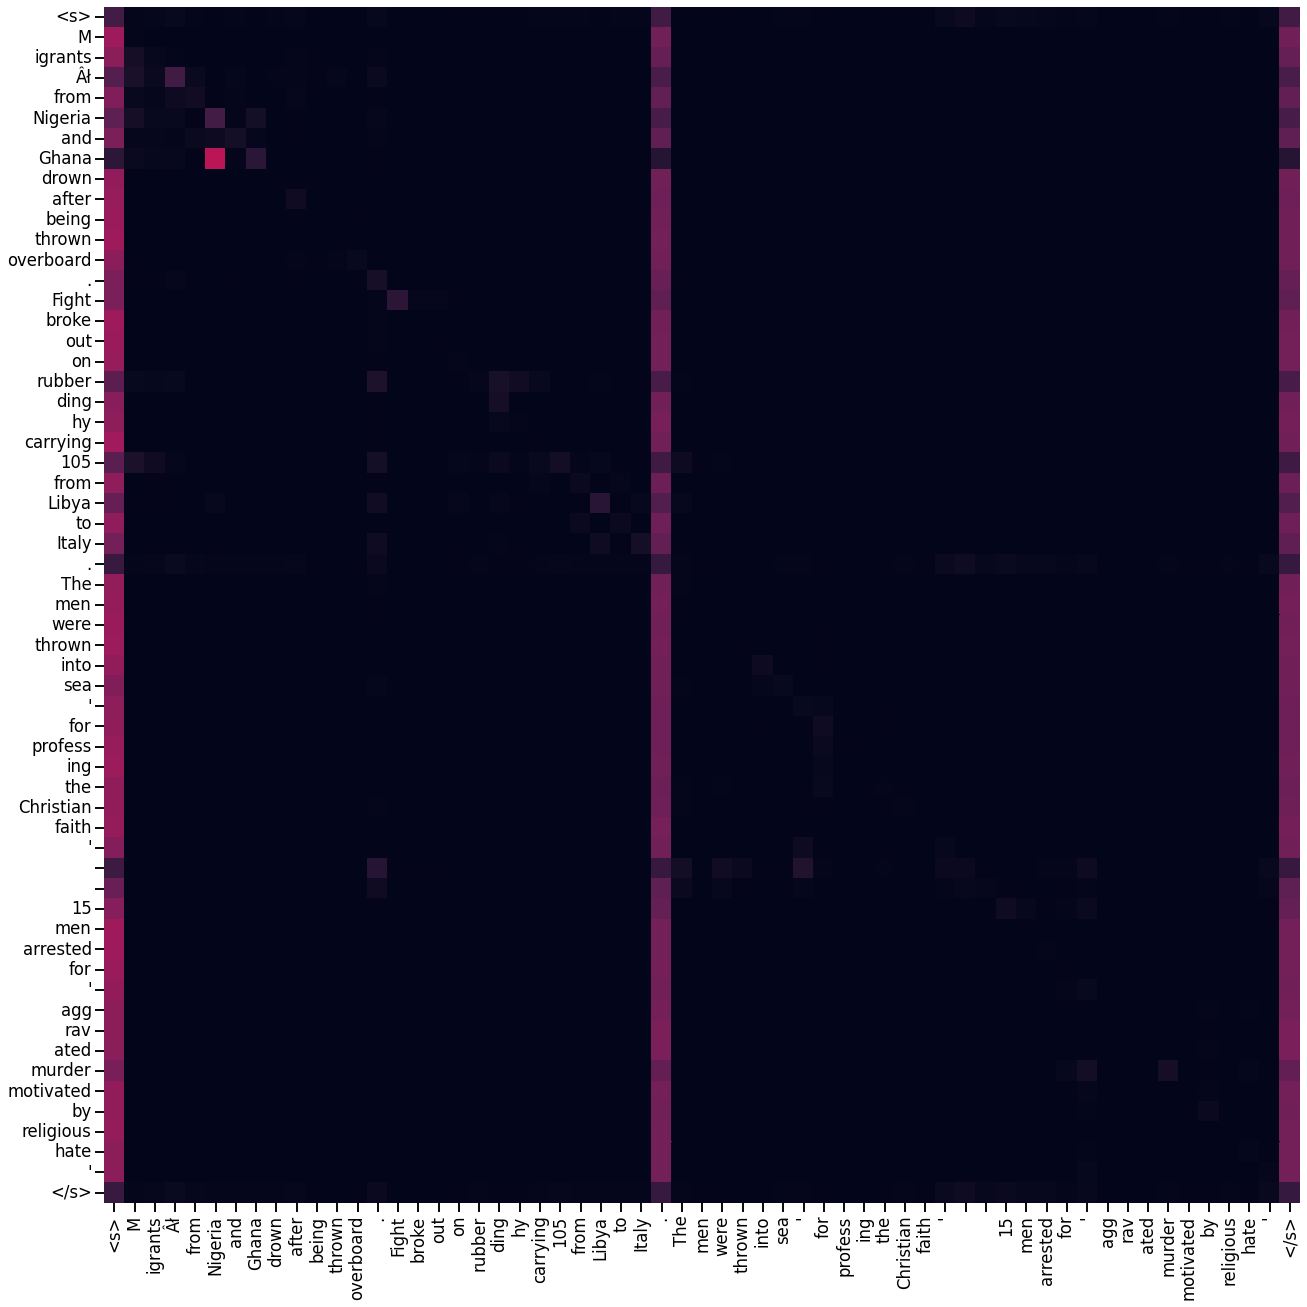

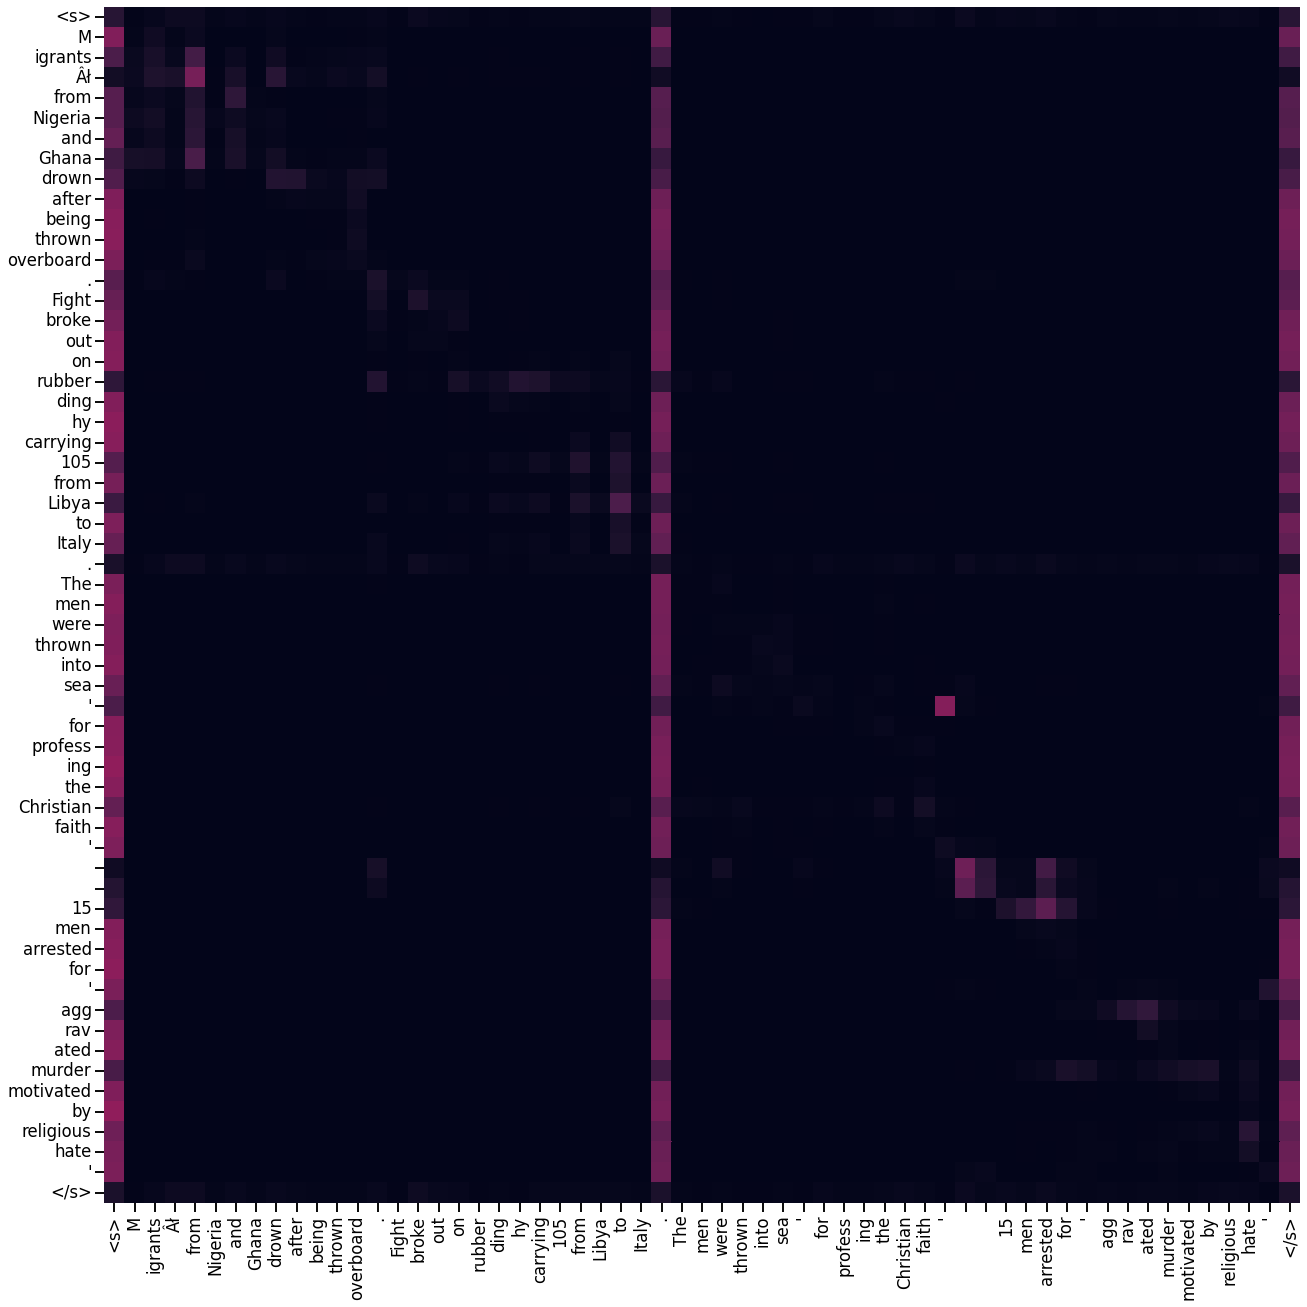

In [ ]:
import matplotlib.pyplot as plt

print(f'Layer : 11 among 0 ~ 11')
print(f'abstract : {abstract}')
layer = 11
for h in range(12):
  fig, axs = plt.subplots(figsize=(22,22))
  attn = attention[layer].squeeze()[h, :, :]
  draw(attn.detach().numpy(), tokens, tokens, axs, f'layer11_{h}.png')

In [ ]:
# [CLS] + Article + [SEP] + candidate1 + [SEP]
inputs = tok.encode_plus(article, candi, return_tensors='pt', max_length=512)
input_ids = inputs['input_ids']
attention = encoder(input_ids)[-1]
input_id_list = input_ids[0].tolist() # Batch index 0
tokens = tok.convert_ids_to_tokens(input_id_list, skip_special_tokens=True)
#print(f'tokens {len(tokens)} : {tokens}')
tokens = [tok.bos_token] + [x.replace("Ġ", "") for x in tokens] + [tok.sep_token]

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


In [ ]:
print(f'tokens {len(tokens)} : {tokens}')
print(f'input_ids {input_ids.shape} : {input_ids}')

tokens 510 : ['<s>', 'A', 'group', 'of', 'Muslim', 'migrants', 'have', 'been', 'arrested', 'for', "'", 'agg', 'rav', 'ated', 'murder', "'", 'after', 'allegedly', 'throwing', '12', 'Christians', 'into', 'the', 'Mediterranean', 'sea', 'during', 'a', 'recent', 'crossing', 'from', 'Libya', ',', 'Italian', 'police', 'reports', '.', 'Witnesses', 'say', 'a', 'fight', 'broke', 'out', 'on', 'a', 'rubber', 'ding', 'hy', 'carrying', 'more', 'than', '100', 'African', 'migrants', 'from', 'Libya', 'to', 'Sicily', ',', 'after', 'which', 'the', 'men', 'were', 'thrown', 'to', 'their', 'deaths', '.', 'A', 'group', 'of', '15', 'men', 'have', 'now', 'been', 'arrested', 'on', 'suspicion', 'of', "'", 'multiple', 'aggravated', 'murder', 'motivated', 'by', 'religious', 'hate', ",'", 'Pal', 'er', 'mo', 'police', 'said', 'in', 'a', 'statement', '.', 'Murd', 'ers', ':', 'A', 'fight', 'over', 'religion', 'broke', 'out', 'on', 'a', 'boat', 'carrying', '105', 'migrants', 'from', 'Libya', ',', 'after', 'which', '12'